In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE

import numpy as np
from copy import deepcopy
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04


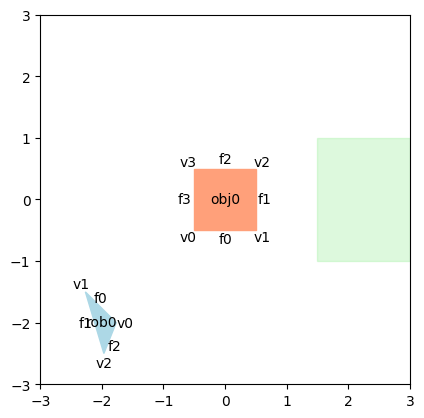

In [2]:
ws = 3
target_regions = [
    ContactRegionParams(region_vertices=[[1.5,-1], [1.5,1], [3,1], [3,-1]],
                  obj_indices=[0]),
]

params = ContactGraphGeneratorParams(
    name="cg_simple_3",
    obs_vertices=[],
    obj_vertices=[np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])],
    rob_vertices=[np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])],
    source_obj_pos=[[0, 0]],
    source_rob_pos=[[-2, -2]],
    target_region_params=target_regions,
    n_pos_per_set=2,
    workspace=[[-ws, ws], [-ws, ws]],
)
generator = ContactGraphGenerator(params)
generator.plot()

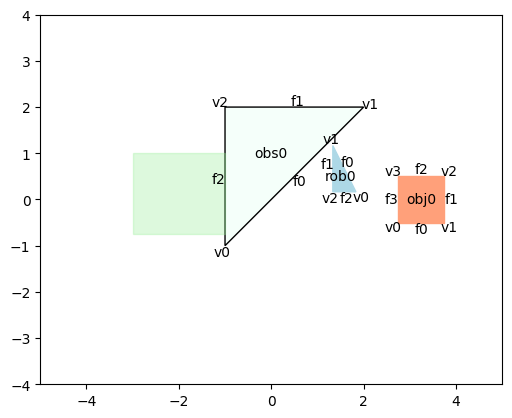

In [5]:
ws_x = 5
ws_y = 4
target_region_params = [
    ContactRegionParams(region_vertices=[[-3,-0.75], [-3,1], [-1,-0.75], [-1,1]],
                  obj_indices=[0]),
]
params = ContactGraphGeneratorParams(
    name="cg_trichal4",
    obs_vertices=[[[-1, 2], [-1, -1], [2, 2]]],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[3.25, 0]],
    source_rob_pos=[[1.5, 0.5]],
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [6]:
generator.generate()

INFO:large_gcs.graph.contact_graph:Generating contact sets for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 67.31it/s]
INFO:large_gcs.graph.contact_graph:Each body pair has on average 6.666666666666667 modes
INFO:large_gcs.graph.contact_graph:Generating force constraints for 216 sets...
100%|██████████| 216/216 [00:00<00:00, 3500.64it/s]
INFO:large_gcs.graph.contact_graph:Generating contact sets for 216 sets...
100%|██████████| 216/216 [00:04<00:00, 51.58it/s]
INFO:large_gcs.graph.contact_graph:Pruning empty sets...
100%|██████████| 216/216 [00:00<00:00, 3705.22it/s]
INFO:large_gcs.graph.contact_graph:179 sets remain after removing 37 empty sets
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 181/181 [00:00<00:00, 7749.55it/s]
INFO:large_gcs.graph.graph:Adding 181 vertices to graph...
100%|██████████| 181/181 [00:00<00:00, 11240.79it/s]
INFO:large_gcs.graph.contact_graph:

Set parameter Username
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04
Academic license - for non-commercial use only - expires 2024-03-04
Academic license - for non-commercial use only - expires 2024-03-04
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04
Academic license - for non-commercial use only - expires 2024-03-04
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04
Academic license - for non-commercial use only - expires 2024-03-04
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04
Set parameter Username
Set parameter Username
Academic license - for non-commercial use on

100%|██████████| 16290/16290 [00:04<00:00, 3600.08it/s]
INFO:large_gcs.graph.contact_graph:6464 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 6464/6464 [00:00<00:00, 8648.43it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 6464/6464 [00:01<00:00, 4618.71it/s]
INFO:large_gcs.graph.graph:Adding 6464 edges to graph...
100%|██████████| 6464/6464 [00:01<00:00, 4386.78it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=181, n_edges=6464, source=[array([3.250, 0.000]), array([1.500, 0.500])], target='regions', workspace=array([[-5,  5],
       [-4,  4]]), default_costs_constraints=None)


In [7]:
# cg = ContactGraph.load_from_file(params.graph_file_path)
cg = ContactGraph.load_from_file(
    ContactGraphGeneratorParams.graph_file_path_from_name("cg_trichal4")
    )

INFO:large_gcs.graph.contact_graph:Loading 20 contact pair modes for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating force constraints for 179 sets...
100%|██████████| 179/179 [00:00<00:00, 4029.91it/s]
INFO:large_gcs.graph.contact_graph:Generating contact sets for 179 sets...
100%|██████████| 179/179 [00:03<00:00, 51.55it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 181/181 [00:00<00:00, 8913.15it/s]
INFO:large_gcs.graph.graph:Adding 181 vertices to graph...
100%|██████████| 181/181 [00:00<00:00, 12287.07it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 6464/6464 [00:00<00:00, 8854.63it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 6464/6464 [00:01<00:00, 4600.42it/s]
INFO:large_gcs.graph.graph:Adding 6464 edges to graph...
100%|██████████| 6464/6464 [00:01<00:00, 4069.87it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_verti

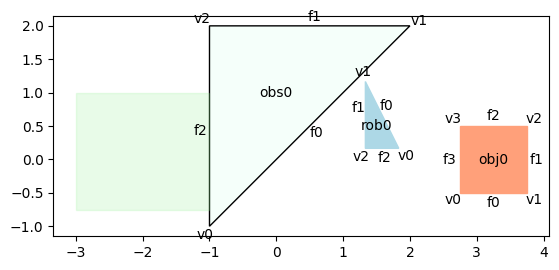

In [8]:
cg.plot()

In [9]:
cg.incoming_edges("target")

[Edge(u="('IC|obs0_f2-obj0_f1', 'NC|obs0_f1-rob0_f2', 'NC|obj0_f1-rob0_f1')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x18274d8f0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x18287c7f0>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x182976bb0>),
 Edge(u="('IC|obs0_f2-obj0_f1', 'NC|obs0_f1-rob0_f2', 'NC|obj0_f2-rob0_f2')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x18274c7b0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x1828452f0>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x182978670>),
 Edge(u="('IC|obs0_f2-obj0_f1', 'NC|obs0_f1-rob0_f2', 'NC|obj0_f3-rob0_v0')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x1827b56f0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x1827d0670>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x1828bbeb0>),
 Edge(u="('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-ro

In [10]:
cg.outgoing_edges("source")

[Edge(u='source', v="('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", costs=[<pydrake.solvers.LinearCost object at 0x182864030>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x1829eba30>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x182ac0570>)]

In [11]:
# sol = cg.solve_shortest_path(use_convex_relaxation=False)
# print(sol)

In [12]:
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=False, obj_multiplier=100)

# gcs_astar = GcsAstarConvexRestriction(
#     cg,
#     cost_estimator=cost_estimator,
#     reexplore_level=ReexploreLevel.PARTIAL,
# )
# sol = gcs_astar.run()

In [13]:
# anim = cg.animate_solution()
# HTML(anim.to_html5_video())

In [12]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=True, obj_multiplier=100)

gcs_astar = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, reexplore_level: ReexploreLevel.NONE
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:visited_fd_vertices: {'target', 'source'}
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.011, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 1 neighbors (0)
DEBUG:large_gcs.algorithms.gcs_astar_convex_restriction:edge source -> ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0') is feasible, new dist: 227.62500008056054, added to pq True
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:visited_fd_vertices: {'target', "('NC|obs0_f0-obj0_v3',

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp5rd2z6m_/temp.m4v


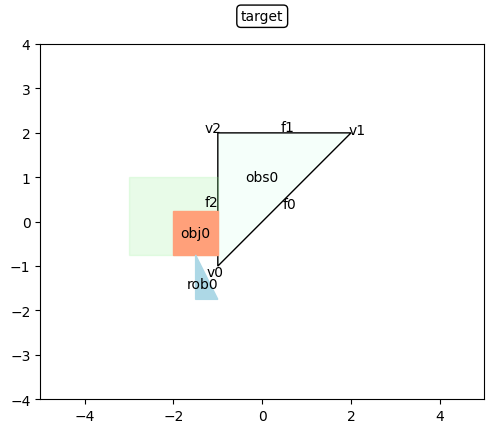

In [13]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp3ts63hli/temp.m4v


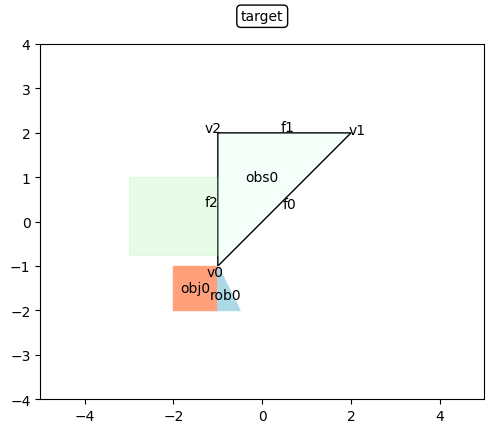

In [20]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())